In [46]:
import pandas as pd
import numpy as np
import pprint

In [47]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import os
import pydotplus

In [48]:
import pandas as pd
import pandas_profiling
df = pd.read_csv("./data/대학원 활성화 정책 추진을 위한 설문조사(RA관련).csv")

In [49]:
df=df.dropna(axis=0)
df

,RA금전적지원여부,RA금전지원자,RA주간투자시간,석박사와의교류여부,RA를통한수행물여부,RA프로젝트참여여부,진로정보,석사진학계획
0,1,교수,10시간 ~ 20시간,교류없음,없음,참여하지 않았음,인터넷,0
1,1,교수,5시간 ~ 10시간,일주일에 5회 이상,공동저자 논문 1개,참여 했음,친구 혹은 선후배,1
2,0,받지않음,~ 3시간,한달에 2회,1저자 논문 1개,참여 했음,교수님,0
3,1,교수,5시간 ~ 10시간,한달에 1회,없음,참여 했음,친구 혹은 선후배,0
4,1,교수,5시간 ~ 10시간,일주일에 2 ~ 3회,없음,참여 했음,친구 혹은 선후배,0
...,...,...,...,...,...,...,...,...
141,1,학과,3시간 ~ 5시간,일주일에 2 ~ 3회,1저자 논문 1개,참여하지 않았음,친구 혹은 선후배,0
142,1,학과,~ 3시간,일주일에 1회,없음,참여 했음,인터넷,0
143,1,학과,5시간 ~ 10시간,교류없음,공동저자 논문 1개,참여하지 않았음,친구 혹은 선후배,1
144,0,받지않음,~ 3시간,한달에 2회,없음,참여하지 않았음,친구 혹은 선후배,0


In [50]:
df_=pd.get_dummies(df, columns = ['RA금전지원자','RA주간투자시간', '석박사와의교류여부', 'RA를통한수행물여부', 
                                  'RA프로젝트참여여부', '진로정보'])

In [51]:
df_

,RA금전적지원여부,석사진학계획,RA금전지원자_교수,RA금전지원자_받지않음,RA금전지원자_학과,RA주간투자시간_10시간 ~ 20시간,RA주간투자시간_3시간 ~ 5시간,RA주간투자시간_5시간 ~ 10시간,RA주간투자시간_~ 3시간,석박사와의교류여부_교류없음,...,RA를통한수행물여부_1저자 논문 2개 이상,RA를통한수행물여부_공동저자 논문 1개,RA를통한수행물여부_공동저자 논문 2개 이상,RA를통한수행물여부_없음,RA프로젝트참여여부_참여 했음,RA프로젝트참여여부_참여하지 않았음,"진로정보_가족, 친척",진로정보_교수님,진로정보_인터넷,진로정보_친구 혹은 선후배
0,1,0,1,0,0,1,0,0,0,1,...,0,0,0,1,0,1,0,0,1,0
1,1,1,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
2,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
3,1,0,1,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,1
4,1,0,1,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
142,1,0,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,1,0
143,1,1,0,0,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
144,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1


In [27]:
df_.to_csv("./data/대학원 활성화 정책 추진을 위한 설문조사(RA관련)_onehot.csv", encoding='cp949')

In [164]:
df__=pd.read_csv("./data/대학원 활성화 정책 추진을 위한 설문조사(RA관련)_onehot_english.csv")

In [165]:
df__

,get_money_by_RA,get_money_from_professor,get_money_from_NONE,get_money_from_gwa_office,RA_spending_time_10to20,RA_spending_time_3to5,RA_spending_time_5to10,RA_spending_time_less3,interact_with_sukbak_NONE,interact_with_sukbak_1perweek,...,RA_achievement_1_coauthor,RA_achievement_more2_coauthor,RA_achievement_NONE,get_involved_in_RA_project,never_get_involved_in_RA_project,career_info_from_family,career_info_from_professor,career_info_from_internet,career_info_from_friends,plan_to_enter_graduate_school
0,1,0,1,0,0,1,0,0,0,1,...,0,0,0,1,0,1,0,0,1,0
1,1,1,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
2,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
3,1,0,1,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,1
4,1,0,1,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
142,1,0,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,1,0
143,1,1,0,0,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
144,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1


In [254]:
# X, y 분리, y='석사진학계획'
X = np.array(df__.loc[:, df__.columns != 'plan_to_enter_graduate_school'])
y = np.array(df__['plan_to_enter_graduate_school'])

In [255]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [256]:
max_depth = 10
min_sample_leaf = 10

dt_clf = DecisionTreeClassifier(criterion = 'gini', max_depth=max_depth, random_state=35,
                                min_samples_leaf=min_sample_leaf)

In [257]:
dt_clf = dt_clf.fit(X_train, y_train)
dt_prediction = dt_clf.predict(X_test)
dt_prediction

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1], dtype=int64)

In [258]:
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin'

In [259]:
feature_names = df__.columns.tolist()
feature_names.remove('plan_to_enter_graduate_school')
len(feature_names)

25

In [260]:
target_name = np.array(['Graduate School No', 'Graduate School Yes'])

dt_dot_data = tree.export_graphviz(dt_clf, out_file = None,
                                   feature_names = feature_names, impurity=True,
                                   class_names = target_name,
                                   filled = True, rounded = True,
                                   special_characters = True)

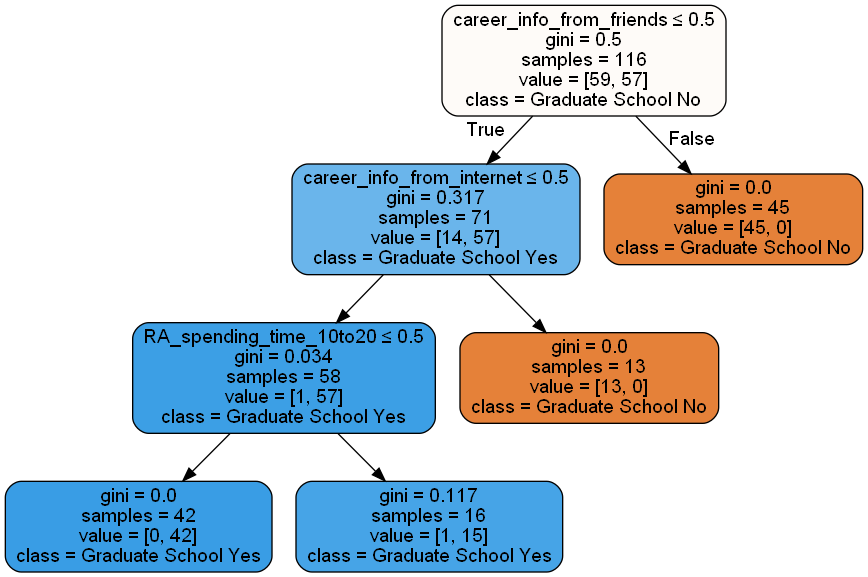

In [261]:
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)
Image(dt_graph.create_png())

In [262]:
print("Accuracy is: ", accuracy_score(dt_prediction, y_test))
print("Precision is:", precision_score(dt_prediction, y_test))
print("Recall is:", recall_score(dt_prediction, y_test))
print("F-1 score is:", f1_score(dt_prediction, y_test, average='weighted'))
print("Confusion matrix:", confusion_matrix(dt_prediction, y_test))
print(classification_report(dt_prediction, y_test))

Accuracy is:  0.9666666666666667
Precision is: 1.0
Recall is: 0.9090909090909091
F-1 score is: 0.9663003663003662
Confusion matrix: [[19  0]
 [ 1 10]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30

